In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series in Pandas and way them creating

In [13]:
s1 = pd.Series([1,2,3,4,5], index=["x", "y", "z", "d", "d"], dtype="float")
s2 = pd.Series({
    "x": 1,
    "y": 2
}, dtype="float")


### DataFrame in Pandas. Creating them

In [22]:
d = {
        "price": pd.Series([1,2,3], index=["v1", "v2", "v3"]),
        "name": pd.Series(["x", "y", "z"], index=["v1", "v2", "v3"])
    }

df = pd.DataFrame(d)
df.index #to see which index in our dataframe. Also you can see which columns in DF
df.columns # for out columns

Index(['price', 'name'], dtype='object')

In [35]:
print(df.loc["v1"])
df.iloc[0]
df[df.columns[:]]
df.loc[df.index]

price    1
name     x
Name: v1, dtype: object


,price,name
v1,1,x
v2,2,y
v3,3,z


In [69]:
#df["price"][lambda x : x > 1]
#df["price"][df["price"] > 1]

# All way which you can see above equivalent

df = pd.DataFrame(dict(
    keys=[ chr(i) for i in range(65, 123)], values=[i for i in range(65,123)]
))


In [61]:
df.sample() # for take random element from DataFrame or series. Also you can to give in method count of n df.sample(n=3). Frac for take procent sample
df.sample(frac=0.1)

,keys,values
3,D,68
50,s,115
8,I,73
25,Z,90
16,Q,81
24,Y,89


In [66]:
df.sample(n=2, axis=0)
df.sample(n=2, axis=1)

,keys,values
29,^,94
52,u,117


In [72]:
df[df["keys"].map(lambda x: x.lower() == "a")]

,keys,values
0,A,65
32,a,97


In [84]:
df[df.isin([1,2])["keys"]]
df[df["values"].isin([66])]

,keys,values
1,B,66


#### <b>DatetimeTZDtype</b> - datetime c поддержкой часового пояса
#### <b>CategoricalDtype</b> Тип для категориальных данных (конечное множествотекстовых элементов)
#### <b>PeriodDtype</b> Тип для работы с периодическими данными
#### <b>SparseDtype</b> Тип для работы с разреженными данными
#### <b>IntervalDtype</b> Тип для работы с интервальными данными

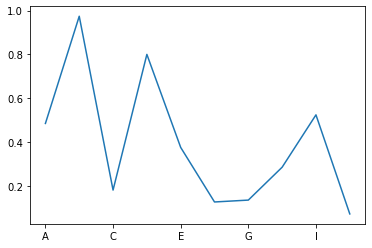

In [110]:
p = pd.Series([np.random.random() for i in range(10)], [chr(i) for i in range(65, 75)])
p.plot()
plt.show()

In [109]:
#p.astype("int") #for change type

In [126]:
df["Name"] = pd.Series([chr(np.random.randint(65, 122)) for i in range(58)])
df["Check"] = pd.Series([np.random.randint(0, 2) for i in range(58)])
df["Check"] = df["Check"].apply(bool)
df.head(3)

,keys,values,Name,Check
0,A,65,N,True
1,B,66,Z,False
2,C,67,t,True


In [129]:
df.select_dtypes(['bool']).head(2)

,Check
0,True
1,False


In [141]:
df["Name"] = df["Name"].astype("category")

In [142]:
df.head(3)

,keys,values,Name,Check
0,A,65,N,True
1,B,66,Z,False
2,C,67,t,True


In [143]:
pd.Categorical(["d", "r", "s", "r", "s", "a"])

[d, r, s, r, s, a]
Categories (4, object): [a, d, r, s]

In [145]:
df["Name"].head(2)

0    N
1    Z
Name: Name, dtype: category
Categories (37, object): [C, G, H, I, ..., r, t, u, v]

In [160]:
colors = pd.Categorical(['r', 'g', 'g', 'd', 'b', 'r', 's', 'y'], categories=['r','g', 'b'], ordered=True)
colors_s = pd.Series(colors).dropna()
colors_s.head(2)
colors_s.min()

df.isnull().sum()

keys      0
values    0
Name      0
Check     0
dtype: int64

### Pandas позволяет задать порог на количество не-NaN элементов. В приведенном ниже примере будут удалены все столбцы в которых количество не-NaN элементов меньше трех:
> df.dropna(axis = 1, thresh=3)

### Для добавления в конец
> df.append(new_row, ignore_index=True)

### Теперь объединим эти две структуры в одну:
> df1 = pd.concat([dfr1, dfr2])


### Если итоговая структура должна являться результатом объединения (логическое ИЛИ), то параметру join необходимо присвоить значение 'outer'.
> dfr4 = pd.DataFrame({'d_type':['d2', 'd3', 'd4'], 'e_type':['e2',
'e3', 'e4']}, index=[1, 2, 3])
> dfr4

<pre>
d_type e_type
1 d2 e2
2 d3 e3
3 d4 e4
</pre>
> df4 = pd.concat([dfr1, dfr4], axis=1, join='outer')
> df4

<pre>
a_type b_type c_type d_type e_type
0 a1 b1 c1 NaN NaN
1 a2 b2 c2 d2 e2
2 a3 b3 c3 d3 e3
3 NaN NaN NaN d4 e4
</pre>

### Если итоговая структура должна являться результатом пересечения (логическое И), то параметру join необходимо присвоить значение 'inner':
> df5 = pd.concat([dfr1, dfr4], axis=1, join='inner')
> df5

<pre>
a_type b_type c_type d_type e_type
1 a2 b2 c2 d2 e2
2 a3 b3 c3 d3 e3
</pre>


- pandas.merge(left, right, how='inner', on=None, left_on=None,
right_on=None, left_index=False, right_index=False, sort=True,
suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

# Statistics
## Таблица 7.1 - Методы для расчета статистик

Метод | Описание
------|---------
count | Количество не-NA объектов
sum   | Сумма
mean  | Среднее значение
mad   | Среднее абсолютное отклонение
median| Медиана
min   | Минимум
max   | Максимум
mode  | Мода
abs   | Абсолютное значение
prod  | Произведение
std   | Стандартное отклонение
var   | Несмещенная дисперсия
sem   | Стандартная ошибка среднего
skew  | Скошенность (момент 3-го порядка)
kurt  | Эксцесс (момент 4-го порядка)
quantile | Квантиль (%)
cumsum| Кумулятивная сумма
cumprod| Кумулятивное произведение
cummax| Кумулятивный максимум
cummin| Кумулятивный минимум

.value_counts() - для получения сводки о кол-ве значений

In [180]:
df[["values"]].agg(["sum", "mean", 'std', "sem"])

,values
sum,5423.000000
mean,93.500000
std,16.886879
sem,2.217356


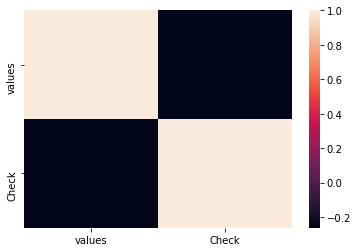

In [182]:
import seaborn as sns
sns.heatmap( df[['values', 'Check']].corr())

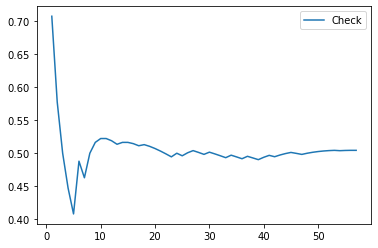

In [191]:
s = df[["Check"]].expanding()
s.std().plot()

In [194]:
pd.period_range('2018', '2020', freq='D')

PeriodIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
             '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
             '2018-01-09', '2018-01-10',
             ...
             '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
             '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
             '2019-12-31', '2020-01-01'],
            dtype='period[D]', length=731, freq='D')

## Построение графиков

> s.plot(style='CS', kind="type")

> df.plot(subplots=True, layout=(1,2), figsize=(10,4))

- ### Kind и типы графиков

Значение параметра kind | Описание
------------------------|---------
'bar' или 'barh'        |Построение столбцовой диаграммы
'hist'| Построение гистограмм
'box' |Коробчатая диаграмма (ящик с усами)
'kde' |Построение графика плотности
'area' |Диаграмма с областями
'scatter'| Точечный график
'hexbin'| Визуализация данных с использованием шестиугольников
'pie' |Круговая диаграмма 

- ### Символы, определяющие цвет

Символ | Цвет
-------|-----
'b' | синий
'g' | зеленый
'r' | красный
'c' | голубой
'm' | пурпурный
'y' | желтый
'k' | черный
'w' | белый


- ### Символы, определяющие тип линии/точек


Символ | Описание
-------|---------
'-' | сплошная линия
'--' | штриховая линия
'-.' | линия “точка-тире”
':' | пунктирная линия
'.' | маркер: точка
',' | маркер: пиксель
'o' | маркер: круг
'v' | маркер: треугольник с направленной вниз вершиной
'^' | маркер: треугольник с направленной вверх вершиной
'<' | маркер: треугольник с направленной влево вершиной
'>' | маркер: треугольник с направленной вправо вершиной
'1' | маркер: трехлучевая звезда, направленная лучом вниз
'2' | маркер: трехлучевая звезда,направленная лучом вверх
'3' | маркер: трехлучевая звезда,направленная лучом влево
'4' | маркер: трехлучевая звезда
's' | маркер: квадрат
'p' | маркер: пятиугольник
'*' | маркер: звезда
'h' | маркер: шестиугольник (тип 1)
'H' | маркер: шестиугольник (тип 2)
'+' | маркер: плюс
'x' | маркер: х
'D' | diamond marker
'd' | thin_diamond marker
'\|' | vline marker
'_' | hline marker

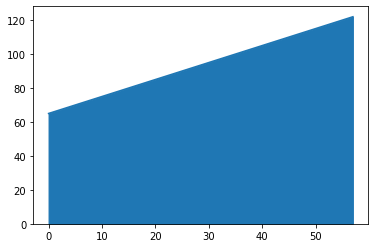

In [216]:
df['values'].plot(kind='area')
plt.show()

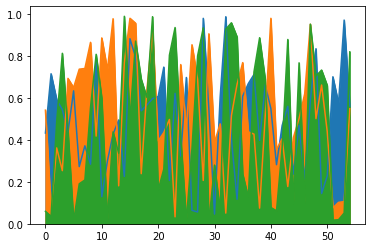

In [223]:
s = pd.Series(np.array([ np.random.random() for i in range(55)]))
s.plot(kind='area')
plt.show()

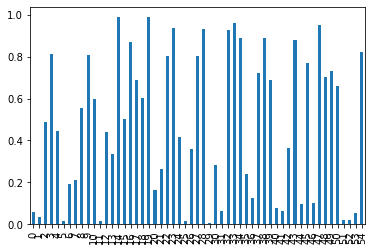

In [225]:
s.plot(kind="bar")

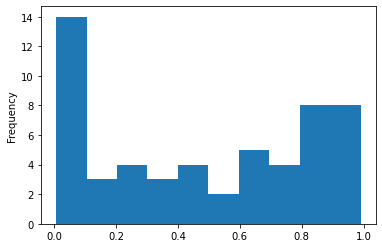

In [226]:
s.plot(kind="hist")

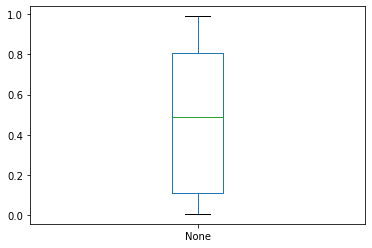

In [227]:
s.plot(kind="box")

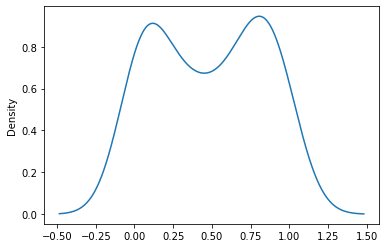

In [228]:
s.plot(kind="kde")

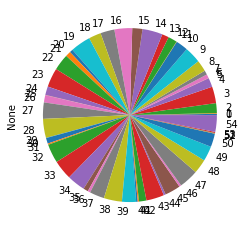

In [230]:
s.plot(kind="pie")

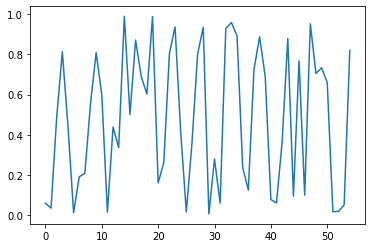

In [231]:
s.plot()

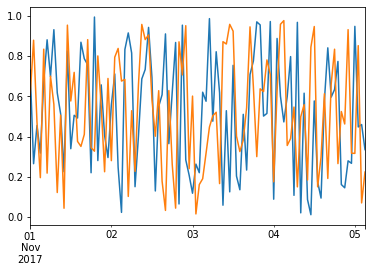

In [235]:
rnd = np.array(
    [np.random.random() for i in range(100)]
)
datetime_index = pd.date_range('2017.11.01', freq='H', periods=len(rnd))

x = pd.Series(rnd, index=datetime_index)
x.plot()
plt.show()

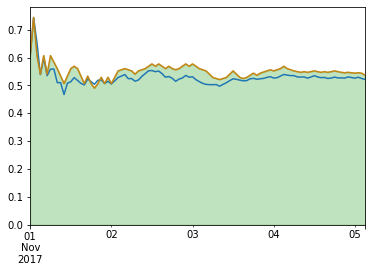

In [258]:
ex = x.expanding()
ex.mean().plot(), ex.median().plot(), ex.median().plot(kind='area', alpha=0.3)
plt.show()